In [41]:
import sdf
import matplotlib
#matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os


######## Constant defined here ########
pi        =     3.1415926535897932384626
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
print('electric field unit: '+str(exunit))
print('magnetic field unit: '+str(bxunit))
print('density unit nc: '+str(denunit))

font = {'family' : 'monospace',  
        'style'  : 'normal',
        'color'  : 'black',  
	    'weight' : 'normal',  
        'size'   : 14,  
       }  


directory = './tacc_workx_txt/'
px = np.loadtxt(directory+'px2d.txt')
py = np.loadtxt(directory+'py2d.txt')
xx = np.loadtxt(directory+'xx2d.txt')
yy = np.loadtxt(directory+'yy2d.txt')
workx2d = np.loadtxt(directory+'workx2d.txt')
worky2d = np.loadtxt(directory+'worky2d.txt')
fieldex = np.loadtxt(directory+'field2dex.txt')
fieldey = np.loadtxt(directory+'field2dey.txt')
fieldbz = np.loadtxt(directory+'field2dbz.txt')
gg = (px**2+py**2+1)**0.5

number=400

tt = np.linspace(5.0,89.9,850)
#tt = tt[:,np.newaxis]

for index in range(gg[:,0].size):
    plt.subplot(2,3,1)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=601.)

    #data = sdf.read("./Data/0000.sdf",dict=True)
    #x  = data['Grid/Grid_mid'].data[0]/1.0e-6
    #y  = data['Grid/Grid_mid'].data[1]/1.0e-6
    #X, Y = np.meshgrid(x, y)
    #den = data['Derived/Number_Density/Subset_high_e'].data/denunit
    #levels = np.linspace(np.min(den.T), np.max(den.T), 40) 
    #plt.contourf(X, Y, den.T, levels=levels, norm=matplotlib.colors.Normalize(vmin=0.,vmax=50.), cmap=cm.Greens)

    #data = sdf.read("./Data/0010.sdf",dict=True)
    #x  = data['Grid/Grid_mid'].data[0]/1.0e-6
    #y  = data['Grid/Grid_mid'].data[1]/1.0e-6
    #X, Y = np.meshgrid(x, y)
    #den = data['Derived/Number_Density/Subset_high_e'].data/denunit
    #levels = np.linspace(np.min(den.T), np.max(den.T), 40) 
    #plt.contourf(X, Y, den.T, levels=levels, norm=matplotlib.colors.Normalize(vmin=0.,vmax=50.), cmap=cm.Greens)

    #data = sdf.read("./Data/0013.sdf",dict=True)
    #x  = data['Grid/Grid_mid'].data[0]/1.0e-6
    #y  = data['Grid/Grid_mid'].data[1]/1.0e-6
    #X, Y = np.meshgrid(x, y)
    #den = data['Derived/Number_Density/Subset_high_e'].data/denunit
    #levels = np.linspace(np.min(den.T), np.max(den.T), 40) 
    #plt.contourf(X, Y, den.T, levels=levels, norm=matplotlib.colors.Normalize(vmin=0.,vmax=50.), cmap=cm.Greens)



    plt.plot(xx[index,:], yy[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:], yy[index,:], c=gg[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar( ticks=np.linspace(np.min(1), np.max(601), 5) )
    cbar.set_label(r'$\gamma$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x\ [\lambda]$',fontdict=font)
    plt.ylabel(r'$y\ [\lambda]$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(2,3,2)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=40)

    plt.plot(xx[index,:],-fieldey[index,:]+(px/gg*fieldbz)[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],-fieldey[index,:]+(px/gg*fieldbz)[index,:], c=-fieldey[index,:]+(px/gg*fieldbz)[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$-E_y+v_xB_z$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$-E_y+v_xB_z$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    theta = np.arctan2(py,px)/np.pi*180    
    plt.subplot(2,3,3)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=601.)

    plt.plot(theta[index,:], gg[index,:],':k',linewidth=0.5)
    plt.scatter(theta[index,:], gg[index,:], c=gg[index,:], norm=norm, s=20, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar( ticks=np.linspace(np.min(1), np.max(601), 5) )
    cbar.set_label(r'$\gamma$',fontdict=font)
    #   plt.legend(loc='upper right')
    plt.xlim(-20,20)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$\theta\ [degree]$',fontdict=font)
    plt.ylabel(r'$\gamma$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(2,3,4)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=40)
    plt.plot(xx[index,:],-fieldex[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],-fieldex[index,:], c=-fieldex[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$-E_x$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$-E_x$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(2,3,5)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=20)

    plt.plot(xx[index,:],-fieldey[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],-fieldey[index,:], c=-fieldey[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$-E_y$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$-E_y$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(2,3,6)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=20)

    plt.plot(xx[index,:],(px/gg*fieldbz)[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],(px/gg*fieldbz)[index,:], c=(px/gg*fieldbz)[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$v_xB_z$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$v_xB_z$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
    
    #plt.show()
    #lt.figure(figsize=(100,100))
    fig = plt.gcf()
    fig.set_size_inches(24, 13)
    fig.savefig('./jpg_tacc_workx/'+str(index).zfill(4)+'.png',format='png',dpi=80)
    plt.close("all")
    print('finised '+str(index))


electric field unit: 3210700953900.7065
magnetic field unit: 10709.745586397328
density unit nc: 1.1148542159362525e+27
finised 0
finised 1
finised 2
finised 3
finised 4
finised 5
finised 6
finised 7
finised 8
finised 9
finised 10
finised 11
finised 12
finised 13
finised 14
finised 15
finised 16
finised 17
finised 18
finised 19
finised 20
finised 21
finised 22
finised 23
finised 24
finised 25
finised 26
finised 27
finised 28
finised 29
finised 30
finised 31
finised 32
finised 33
finised 34
finised 35
finised 36
finised 37
finised 38
finised 39
finised 40
finised 41
finised 42
finised 43
finised 44
finised 45
finised 46
finised 47
finised 48
finised 49
finised 50
finised 51
finised 52
finised 53
finised 54
finised 55
finised 56
finised 57
finised 58
finised 59
finised 60
finised 61
finised 62
finised 63
finised 64
finised 65
finised 66
finised 67
finised 68
finised 69
finised 70
finised 71
finised 72
finised 73
finised 74
finised 75
finised 76
finised 77
finised 78
finised 79
finised 80

In [33]:
(xx[index,:]).shape

(850,)

electric field unit: 3210700953900.7065
magnetic field unit: 10709.745586397328
density unit nc: 1.1148542159362525e+27


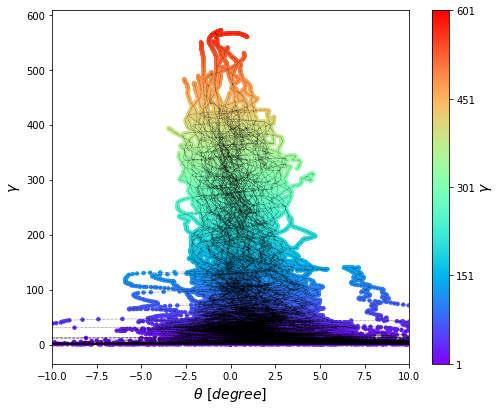

In [1]:
import sdf
import matplotlib
#matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os


######## Constant defined here ########
pi        =     3.1415926535897932384626
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
print('electric field unit: '+str(exunit))
print('magnetic field unit: '+str(bxunit))
print('density unit nc: '+str(denunit))

font = {'family' : 'monospace',  
        'style'  : 'normal',
        'color'  : 'black',  
	    'weight' : 'normal',  
        'size'   : 14,  
       }  


directory = './tacc_workx_txt/'
px = np.loadtxt(directory+'px2d.txt')
py = np.loadtxt(directory+'py2d.txt')
xx = np.loadtxt(directory+'xx2d.txt')
yy = np.loadtxt(directory+'yy2d.txt')
workx2d = np.loadtxt(directory+'workx2d.txt')
worky2d = np.loadtxt(directory+'worky2d.txt')
gg = (px**2+py**2+1)**0.5
theta = np.arctan2(py,px)/np.pi*180

    
plt.subplot()
norm = matplotlib.colors.Normalize(vmin=1.,vmax=601.)

for index in range(100):
    plt.plot(theta[index,:], gg[index,:],':k',linewidth=0.5)
    plt.scatter(theta[index,:], gg[index,:], c=gg[index,:], norm=norm, s=20, cmap='rainbow', edgecolors='None')
cbar=plt.colorbar( ticks=np.linspace(np.min(1), np.max(601), 5) )
cbar.set_label(r'$\gamma$',fontdict=font)
#   plt.legend(loc='upper right')
plt.xlim(-10,10)
#plt.ylim(-4.9,4.9)
plt.xlabel(r'$\theta\ [degree]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
#plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)


#plt.show()
#lt.figure(figsize=(100,100))
fig = plt.gcf()
fig.set_size_inches(8, 6.5)
fig.savefig('./theta_x_10.png',format='png',dpi=80)
#plt.close("all")
#print('finised '+str(round(100.0*(n-start+step)/(stop-start+step),4))+'%')


electric field unit: 3210700953900.7065
magnetic field unit: 10709.745586397328
density unit nc: 1.1148542159362525e+27


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:55: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.


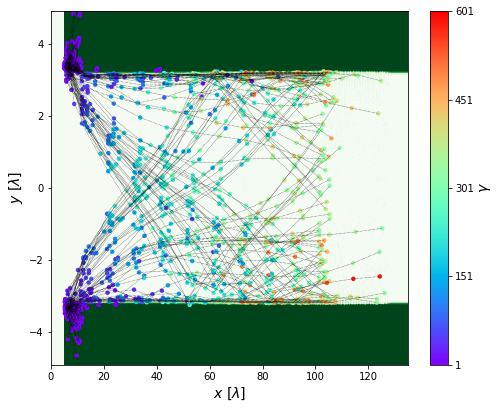

In [2]:
import sdf
import matplotlib
#matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os


######## Constant defined here ########
pi        =     3.1415926535897932384626
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
print('electric field unit: '+str(exunit))
print('magnetic field unit: '+str(bxunit))
print('density unit nc: '+str(denunit))

font = {'family' : 'monospace',  
        'style'  : 'normal',
        'color'  : 'black',  
	    'weight' : 'normal',  
        'size'   : 14,  
       }  


directory = './txt_trace/'
px = np.loadtxt(directory+'px2d.txt')
py = np.loadtxt(directory+'py2d.txt')
xx = np.loadtxt(directory+'xx2d.txt')
yy = np.loadtxt(directory+'yy2d.txt')
workx2d = np.loadtxt(directory+'workx2d.txt')
worky2d = np.loadtxt(directory+'worky2d.txt')
gg = (px**2+py**2+1)**0.5


    
plt.subplot()
norm = matplotlib.colors.Normalize(vmin=1.,vmax=601.)

data = sdf.read("./Data/0000.sdf",dict=True)
x  = data['Grid/Grid_mid'].data[0]/1.0e-6
y  = data['Grid/Grid_mid'].data[1]/1.0e-6
X, Y = np.meshgrid(x, y)
den = data['Derived/Number_Density/Subset_high_e'].data/denunit
levels = np.linspace(np.min(den.T), np.max(den.T), 40) 
plt.contourf(X, Y, den.T, levels=levels, norm=matplotlib.colors.Normalize(vmin=0.,vmax=50.), cmap=cm.Greens)

data = sdf.read("./Data/0010.sdf",dict=True)
x  = data['Grid/Grid_mid'].data[0]/1.0e-6
y  = data['Grid/Grid_mid'].data[1]/1.0e-6
X, Y = np.meshgrid(x, y)
den = data['Derived/Number_Density/Subset_high_e'].data/denunit
levels = np.linspace(np.min(den.T), np.max(den.T), 40) 
plt.contourf(X, Y, den.T, levels=levels, norm=matplotlib.colors.Normalize(vmin=0.,vmax=50.), cmap=cm.Greens)

data = sdf.read("./Data/0013.sdf",dict=True)
x  = data['Grid/Grid_mid'].data[0]/1.0e-6
y  = data['Grid/Grid_mid'].data[1]/1.0e-6
X, Y = np.meshgrid(x, y)
den = data['Derived/Number_Density/Subset_high_e'].data/denunit
levels = np.linspace(np.min(den.T), np.max(den.T), 40) 
plt.contourf(X, Y, den.T, levels=levels, norm=matplotlib.colors.Normalize(vmin=0.,vmax=50.), cmap=cm.Greens)


for index in range(108):
    plt.plot(xx[index,:], yy[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:], yy[index,:], c=gg[index,:], norm=norm, s=20, cmap='rainbow', edgecolors='None')
cbar=plt.colorbar( ticks=np.linspace(np.min(1), np.max(601), 5) )
cbar.set_label(r'$\gamma$',fontdict=font)
#   plt.legend(loc='upper right')
#plt.xlim(-500,900)
plt.ylim(-4.9,4.9)
plt.xlabel(r'$x\ [\lambda]$',fontdict=font)
plt.ylabel(r'$y\ [\lambda]$',fontdict=font)
#plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)


#plt.show()
#lt.figure(figsize=(100,100))
fig = plt.gcf()
fig.set_size_inches(8, 6.5)
#fig.savefig('./trajectory_x.png',format='png',dpi=80)
#plt.close("all")
#print('finised '+str(round(100.0*(n-start+step)/(stop-start+step),4))+'%')


In [8]:
directory = './inject_txt/'
#px = np.loadtxt(directory+'px2d.txt')
#py = np.loadtxt(directory+'py2d.txt')
xx = np.loadtxt(directory+'xx2d.txt')
yy = np.loadtxt(directory+'yy2d.txt')
print('total size is:',xx[:,0].size,' and >15 is:', xx[xx[:,0] > 15,0].size,)

total size is: 51755  and >15 is: 5526


electric field unit: 3210700953900.7065
magnetic field unit: 10709.745586397328


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:56: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.


density unit nc: 1.1148542159362525e+27
begin pltscatter


IndexError: index 15477 is out of bounds for axis 0 with size 108

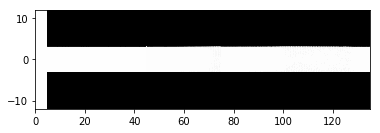

In [4]:
import sdf
import matplotlib
#matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
import random


######## Constant defined here ########
pi        =     3.1415926535897932384626
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
print('electric field unit: '+str(exunit))
print('magnetic field unit: '+str(bxunit))
print('density unit nc: '+str(denunit))

font = {'family' : 'monospace',  
        'style'  : 'normal',
        'color'  : 'black',  
	    'weight' : 'normal',  
        'size'   : 14,  
       }  


directory = './inject_txt/'
#px = np.loadtxt(directory+'px2d.txt')
#py = np.loadtxt(directory+'py2d.txt')
xx = np.loadtxt(directory+'xx2d.txt')
yy = np.loadtxt(directory+'yy2d.txt')
#workx2d = np.loadtxt(directory+'workx2d.txt')
#worky2d = np.loadtxt(directory+'worky2d.txt')
gg = (px**2+py**2+1)**0.5


    
plt.subplot(2,1,1)
norm = matplotlib.colors.Normalize(vmin=1.,vmax=601.)

data = sdf.read("./Data/0000.sdf",dict=True)
x  = data['Grid/Grid_mid'].data[0]/1.0e-6
y  = data['Grid/Grid_mid'].data[1]/1.0e-6
X, Y = np.meshgrid(x, y)
den = data['Derived/Number_Density/Subset_high_e'].data/denunit
levels = np.linspace(np.min(den.T), np.max(den.T), 40) 
plt.contourf(X, Y, den.T, levels=levels, norm=matplotlib.colors.Normalize(vmin=0.,vmax=50.), cmap=cm.Greys)

data = sdf.read("./Data/0010.sdf",dict=True)
x  = data['Grid/Grid_mid'].data[0]/1.0e-6
y  = data['Grid/Grid_mid'].data[1]/1.0e-6
X, Y = np.meshgrid(x, y)
den = data['Derived/Number_Density/Subset_high_e'].data/denunit
levels = np.linspace(np.min(den.T), np.max(den.T), 40) 
plt.contourf(X, Y, den.T, levels=levels, norm=matplotlib.colors.Normalize(vmin=0.,vmax=50.), cmap=cm.Greys)

data = sdf.read("./Data/0013.sdf",dict=True)
x  = data['Grid/Grid_mid'].data[0]/1.0e-6
y  = data['Grid/Grid_mid'].data[1]/1.0e-6
X, Y = np.meshgrid(x, y)
den = data['Derived/Number_Density/Subset_high_e'].data/denunit
levels = np.linspace(np.min(den.T), np.max(den.T), 40) 
plt.contourf(X, Y, den.T, levels=levels, norm=matplotlib.colors.Normalize(vmin=0.,vmax=50.), cmap=cm.Greys)

index = random.sample(range(xx[:,0].size), xx[:,0].size)
print('begin pltscatter')
plt.scatter(xx[index,0], yy[index,0], c=gg[index,1], norm=norm, s=2, cmap='rainbow', edgecolors='None')
cbar=plt.colorbar( ticks=np.linspace(np.min(1), np.max(701), 5), orientation='horizontal')
cbar.set_label(r'$\gamma$',fontdict=font)
#   plt.legend(loc='upper right')
plt.xlim(0,60)
plt.ylim(-4.9,4.9)
plt.xlabel(r'$x\ [\lambda]$',fontdict=font)
plt.ylabel(r'$y\ [\lambda]$',fontdict=font)
#plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,1,2)
num_bins=60
plt.hist(xx[index,0], num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.xlim(0,60)
#plt.ylim(-4.9,4.9)
plt.xlabel(r'$x\ [\lambda]$',fontdict=font)
plt.ylabel(r'$dN/dx$',fontdict=font)

print('total size is:',xx[:,0].size,' and >10 is:', xx[xx > 10].size,)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.15, right=0.95, hspace=0.15, wspace=0.30)
#plt.show()
#lt.figure(figsize=(100,100))
fig = plt.gcf()
fig.set_size_inches(8, 10.5)
#fig.savefig('./electron_injection_13_gt20.png',format='png',dpi=80)
#plt.close("all")
#print('finised '+str(round(100.0*(n-start+step)/(stop-start+step),4))+'%')


In [5]:
import random
random.sample(range(10),  3)

[5, 0, 9]

In [22]:
a=np.linspace(5.0,89.9,850)
a[:,np.newaxis=20]

SyntaxError: invalid syntax (<ipython-input-22-5b91f21090f9>, line 2)

In [44]:
import sdf
import matplotlib
#matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os


######## Constant defined here ########
pi        =     3.1415926535897932384626
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
print('electric field unit: '+str(exunit))
print('magnetic field unit: '+str(bxunit))
print('density unit nc: '+str(denunit))

font = {'family' : 'monospace',  
        'style'  : 'normal',
        'color'  : 'black',  
	    'weight' : 'normal',  
        'size'   : 14,  
       }  


directory = './tacc_worky_txt/'
px = np.loadtxt(directory+'px2d.txt')
py = np.loadtxt(directory+'py2d.txt')
xx = np.loadtxt(directory+'xx2d.txt')
yy = np.loadtxt(directory+'yy2d.txt')
workx2d = np.loadtxt(directory+'workx2d.txt')
worky2d = np.loadtxt(directory+'worky2d.txt')
fieldex = np.loadtxt(directory+'field2dex.txt')
fieldey = np.loadtxt(directory+'field2dey.txt')
fieldbz = np.loadtxt(directory+'field2dbz.txt')
gg = (px**2+py**2+1)**0.5

number=400

tt = np.linspace(5.0,89.9,850)
#tt = tt[:,np.newaxis]

for index in range(gg[:,0].size):
    plt.subplot(2,3,1)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=601.)

    #data = sdf.read("./Data/0000.sdf",dict=True)
    #x  = data['Grid/Grid_mid'].data[0]/1.0e-6
    #y  = data['Grid/Grid_mid'].data[1]/1.0e-6
    #X, Y = np.meshgrid(x, y)
    #den = data['Derived/Number_Density/Subset_high_e'].data/denunit
    #levels = np.linspace(np.min(den.T), np.max(den.T), 40) 
    #plt.contourf(X, Y, den.T, levels=levels, norm=matplotlib.colors.Normalize(vmin=0.,vmax=50.), cmap=cm.Greens)

    #data = sdf.read("./Data/0010.sdf",dict=True)
    #x  = data['Grid/Grid_mid'].data[0]/1.0e-6
    #y  = data['Grid/Grid_mid'].data[1]/1.0e-6
    #X, Y = np.meshgrid(x, y)
    #den = data['Derived/Number_Density/Subset_high_e'].data/denunit
    #levels = np.linspace(np.min(den.T), np.max(den.T), 40) 
    #plt.contourf(X, Y, den.T, levels=levels, norm=matplotlib.colors.Normalize(vmin=0.,vmax=50.), cmap=cm.Greens)

    #data = sdf.read("./Data/0013.sdf",dict=True)
    #x  = data['Grid/Grid_mid'].data[0]/1.0e-6
    #y  = data['Grid/Grid_mid'].data[1]/1.0e-6
    #X, Y = np.meshgrid(x, y)
    #den = data['Derived/Number_Density/Subset_high_e'].data/denunit
    #levels = np.linspace(np.min(den.T), np.max(den.T), 40) 
    #plt.contourf(X, Y, den.T, levels=levels, norm=matplotlib.colors.Normalize(vmin=0.,vmax=50.), cmap=cm.Greens)



    plt.plot(xx[index,:], yy[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:], yy[index,:], c=gg[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar( ticks=np.linspace(np.min(1), np.max(601), 5) )
    cbar.set_label(r'$\gamma$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x\ [\lambda]$',fontdict=font)
    plt.ylabel(r'$y\ [\lambda]$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(2,3,2)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=40)

    plt.plot(xx[index,:],-fieldey[index,:]+(px/gg*fieldbz)[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],-fieldey[index,:]+(px/gg*fieldbz)[index,:], c=-fieldey[index,:]+(px/gg*fieldbz)[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$-E_y+v_xB_z$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$-E_y+v_xB_z$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    theta = np.arctan2(py,px)/np.pi*180    
    plt.subplot(2,3,3)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=601.)

    plt.plot(theta[index,:], gg[index,:],':k',linewidth=0.5)
    plt.scatter(theta[index,:], gg[index,:], c=gg[index,:], norm=norm, s=20, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar( ticks=np.linspace(np.min(1), np.max(601), 5) )
    cbar.set_label(r'$\gamma$',fontdict=font)
    #   plt.legend(loc='upper right')
    plt.xlim(-20,20)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$\theta\ [degree]$',fontdict=font)
    plt.ylabel(r'$\gamma$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(2,3,4)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=40)
    plt.plot(xx[index,:],-fieldex[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],-fieldex[index,:], c=-fieldex[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$-E_x$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$-E_x$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(2,3,5)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=20)

    plt.plot(xx[index,:],-fieldey[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],-fieldey[index,:], c=-fieldey[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$-E_y$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$-E_y$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(2,3,6)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=20)

    plt.plot(xx[index,:],(px/gg*fieldbz)[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],(px/gg*fieldbz)[index,:], c=(px/gg*fieldbz)[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$v_xB_z$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$v_xB_z$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
    
    #plt.show()
    #lt.figure(figsize=(100,100))
    fig = plt.gcf()
    fig.set_size_inches(24, 13)
    fig.savefig('./jpg_tacc_worky/'+str(index).zfill(4)+'.png',format='png',dpi=80)
    plt.close("all")
    print('finised '+str(index))


electric field unit: 3210700953900.7065
magnetic field unit: 10709.745586397328
density unit nc: 1.1148542159362525e+27
finised 0
finised 1
finised 2
finised 3
finised 4
finised 5
finised 6
finised 7
finised 8
finised 9
finised 10
finised 11
finised 12
finised 13
finised 14
finised 15
finised 16
finised 17
finised 18
finised 19
finised 20
finised 21
finised 22
finised 23
finised 24
finised 25
finised 26
finised 27
finised 28
finised 29
finised 30
finised 31
finised 32
finised 33
finised 34
finised 35
finised 36
finised 37
finised 38
finised 39
finised 40
finised 41
finised 42
finised 43
finised 44
finised 45
finised 46
finised 47
finised 48
finised 49
finised 50
finised 51
finised 52
finised 53
finised 54
finised 55
finised 56
finised 57
finised 58
finised 59
finised 60
finised 61
finised 62
finised 63
finised 64
finised 65
finised 66
finised 67
finised 68
finised 69
finised 70
finised 71
finised 72
finised 73
finised 74
finised 75
finised 76
finised 77
finised 78
finised 79
finised 80

In [52]:
import cmocean
help(cmocean.cm)

Help on module cmocean.cm in cmocean:

NAME
    cmocean.cm - Standardized colormaps for oceanography plots.

DESCRIPTION
    Used tool from http://bids.github.io/colormap/ to make perceptually correct
    colormaps.
    
    Created by Kristen Thyng
    2016-06-18

DATA
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...
    algae = <matplotlib.colors.LinearSegmentedColormap object>
    algae_r = <matplotlib.colors.LinearSegmentedColormap object>
    amp = <matplotlib.colors.LinearSegmentedColormap object>
    amp_r = <matplotlib.colors.LinearSegmentedColormap object>
    balance = <matplotlib.colors.LinearSegmentedColormap object>
    balance_r = <matplotlib.colors.LinearSegmentedColormap object>
    cmap_d = {'algae': <matplotlib.colors.LinearSegmentedColormap object>,...
    cmapname = 'curl'
    cmapnames = ['thermal', 'haline', 'solar', 'ice', 'gray', 'oxy', 'deep...
    curl = <matplotlib.colors.LinearSegmentedColormap object>
    curl_r = <matplotlib.co

In [54]:
np.logspace(-1,10,11)

array([1.00000000e-01, 1.25892541e+00, 1.58489319e+01, 1.99526231e+02,
       2.51188643e+03, 3.16227766e+04, 3.98107171e+05, 5.01187234e+06,
       6.30957344e+07, 7.94328235e+08, 1.00000000e+10])

This is main of module "test2d.py"
electric field unit: 3210700953900.7065
magnetic field unit: 10709.745586397328
density unit nc: 1.1148542159362525e+27
ok
7.829334358592894


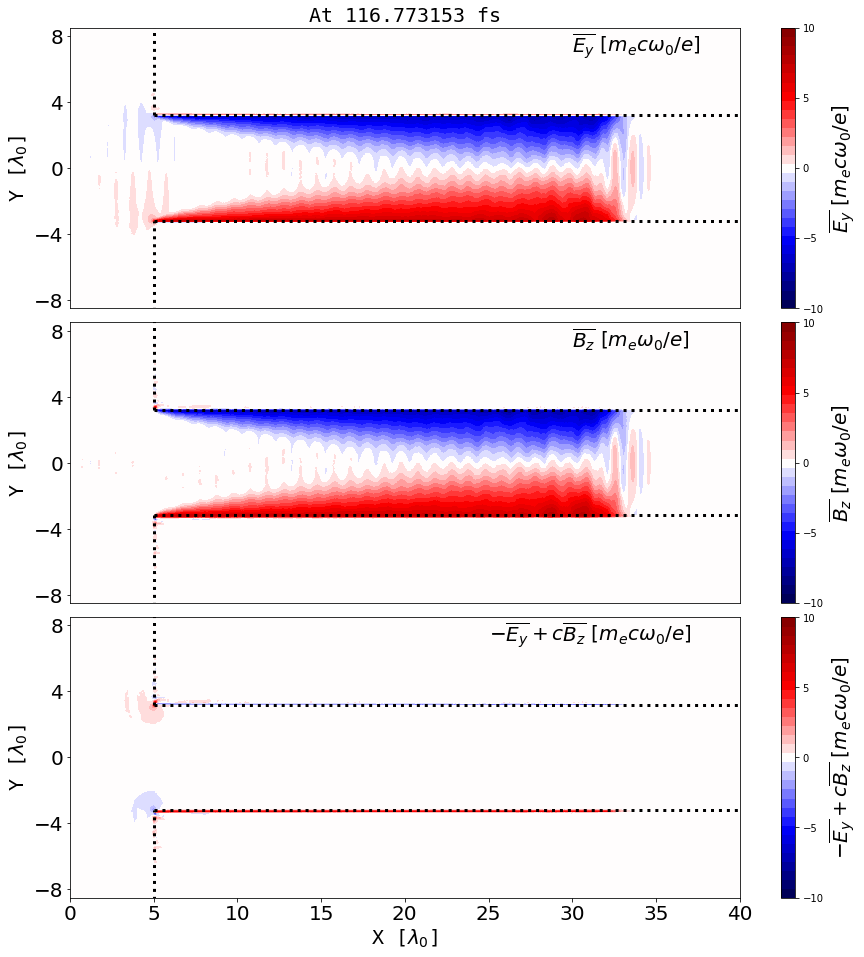

In [30]:
#!/public/home/users/bio001/tools/python-2.7.11/bin/python
import sdf
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
import matplotlib.colors as mcolors 
import scipy.ndimage as ndimage
  
if __name__ == "__main__":
    print ('This is main of module "test2d.py"')
    ######## Constant defined here ########
    pi        =     3.1415926535897932384626
    q0        =     1.602176565e-19 # C
    m0        =     9.10938291e-31  # kg
    v0        =     2.99792458e8    # m/s^2
    kb        =     1.3806488e-23   # J/K
    mu0       =     4.0e-7*np.pi       # N/A^2
    epsilon0  =     8.8541878176203899e-12 # F/m
    h_planck  =     6.62606957e-34  # J s
    wavelength=     1.0e-6
    frequency =     v0*2*pi/wavelength

    exunit    =     m0*v0*frequency/q0
    bxunit    =     m0*frequency/q0
    denunit    =     frequency**2*epsilon0*m0/q0**2
    jalf      =     4*np.pi*epsilon0*m0*v0**3/q0/wavelength**2
    print('electric field unit: '+str(exunit))
    print('magnetic field unit: '+str(bxunit))
    print('density unit nc: '+str(denunit))

    font = {'family' : 'monospace',  
          'color'  : 'black',  
          'weight' : 'normal',  
          'size'   : 20,  
          }  
    
##below is for generating mid transparent colorbar
    c_red = matplotlib.colors.colorConverter.to_rgba('red')
    c_blue= matplotlib.colors.colorConverter.to_rgba('blue')
    c_white_trans = matplotlib.colors.colorConverter.to_rgba('white',alpha = 0.0)
    cmap_rb = matplotlib.colors.LinearSegmentedColormap.from_list('rb_cmap',[c_red,c_white_trans,c_blue],128) 
    cmap_br = matplotlib.colors.LinearSegmentedColormap.from_list('rb_cmap',[c_blue,c_white_trans,c_red],128) 
##end for transparent colorbar##

##below is for norm colorbar
    class MidpointNormalize(colors.Normalize):
        def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
            self.midpoint = midpoint
            colors.Normalize.__init__(self, vmin, vmax, clip)

        def __call__(self, value, clip=None):
            # I'm ignoring masked values and all kinds of edge cases to make a
            # simple example...
            x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
            return np.ma.masked_array(np.interp(value, x, y)) 
##end for norm colorbar####

    #### header data ####
    data = sdf.read("./Data_a20/0007.sdf",dict=True)
    header=data['Header']
    time=header['time']
    x  = data['Grid/Grid_mid'].data[0]/1.0e-6
    print('ok')
    y  = data['Grid/Grid_mid'].data[1]/1.0e-6
    X, Y = np.meshgrid(x, y)

    
    line_y1 = np.linspace(-12,-3.2,1001)
    line_x1 = np.zeros_like(line_y)+5
    
    line_y2 = np.linspace(3.2,12,1001)
    line_x2 = np.zeros_like(line_y)+5
    
    line_x3 = np.linspace(5,50.0,1001)
    line_y3 = np.zeros_like(line_y)+3.2
    
    line_x4 = np.linspace(5,50.0,1001)
    line_y4 = np.zeros_like(line_y)-3.2
    
    
    plt.subplot(3,1,1)
    #den = data['Derived/Number_Density/Subset_high_e'].data/denunit
    
    #levels = np.logspace(-0.3, 2, 51)/2
    #den.T[den.T > 49.999]=49.999 
    #plt.contourf(X, Y, den.T, levels=levels, norm=mcolors.LogNorm(vmin=levels.min(), vmax=levels.max()), cmap='binary')
    ##### manifesting colorbar, changing label and axis properties ####
    #cbar=plt.colorbar(ticks=np.logspace(0.0, 2.0, 3))
    #cbar.set_label(r'$n_e\ [n_c]$', fontdict=font)
    
    ex = data['Electric Field/Ey_averaged'].data/exunit
    #ex[ex > 8]=8 
    #ex[ex < -8]=-8 
    print(ex.max())
    #eee=np.max([-np.min(ex.T),np.max(ex.T)])
    levels = np.linspace(-10, 10, 32)
    plt.contourf(X, Y, ex.T, levels=levels, norm=mcolors.Normalize(vmin=-10.0, vmax=10.0), cmap=cm.seismic)
    
    plt.plot(line_x1,line_y1,linewidth=3,linestyle=':',color='k')
    plt.plot(line_x2,line_y2,linewidth=3,linestyle=':',color='k')
    plt.plot(line_x3,line_y3,linewidth=3,linestyle=':',color='k')
    plt.plot(line_x4,line_y4,linewidth=3,linestyle=':',color='k')
    #### manifesting colorbar, changing label and axis properties ####
    cbar=plt.colorbar(ticks=[-10.0, -5.0, 0.0, 5.0, 10.0])
    cbar.set_label(r'$\overline{E_y}\ [m_ec\omega_0/e]$',fontdict=font)      
    plt.text(30,7,r'$\overline{E_y}\ [m_ec\omega_0/e]$',fontdict=font)
    #plt.xlabel(r'X [$\lambda_0$]',fontdict=font)
    plt.ylabel(r'Y [$\lambda_0$]',fontdict=font)
    plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    plt.xticks([])
    plt.title('At '+str(round(time/1.0e-15,6))+' fs',fontdict=font)
    plt.xlim(0,40)
    plt.ylim(-8.5,8.5)
    plt.yticks(np.linspace(-8,8,5))
    
    
    plt.subplot(3,1,2)
    ex = data['Magnetic Field/Bz_averaged'].data/bxunit
    #ex[ex > 8]=8 
    #ex[ex < -8]=-8 
    #eee=np.max([-np.min(ex.T),np.max(ex.T)])
    levels = np.linspace(-10, 10, 32)
    plt.contourf(X, Y, ex.T, levels=levels, norm=mcolors.Normalize(vmin=-10.0, vmax=10.0), cmap=cm.seismic)
    #### manifesting colorbar, changing label and axis properties ####
    plt.plot(line_x1,line_y1,linewidth=3,linestyle=':',color='k')
    plt.plot(line_x2,line_y2,linewidth=3,linestyle=':',color='k')
    plt.plot(line_x3,line_y3,linewidth=3,linestyle=':',color='k')
    plt.plot(line_x4,line_y4,linewidth=3,linestyle=':',color='k')
    cbar=plt.colorbar(ticks=[-10.0, -5.0, 0.0, 5.0, 10.0])
    cbar.set_label(r'$\overline{B_z}\ [m_e\omega_0/e]$',fontdict=font) 
    plt.text(30,7,r'$\overline{B_z}\ [m_e\omega_0/e]$',fontdict=font)
    #plt.xlabel(r'X [$\lambda_0$]',fontdict=font)
    plt.ylabel(r'Y [$\lambda_0$]',fontdict=font)
    plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    plt.xticks([])
    plt.xlim(0,40)
    plt.ylim(-8.5,8.5)
    plt.yticks(np.linspace(-8,8,5))
    
    
    plt.subplot(3,1,3)
    ex = data['Magnetic Field/Bz_averaged'].data/bxunit-data['Electric Field/Ey_averaged'].data/exunit
    ex[ex > 5]=5
    ex[ex < -5]=-5 
    #eee=np.max([-np.min(ex.T),np.max(ex.T)])
    levels = np.linspace(-10, 10, 32)
    plt.contourf(X, Y, ex.T, levels=levels, norm=mcolors.Normalize(vmin=-10.0, vmax=10.0), cmap=cm.seismic)
    plt.plot(line_x1,line_y1,linewidth=3,linestyle=':',color='k')
    plt.plot(line_x2,line_y2,linewidth=3,linestyle=':',color='k')
    plt.plot(line_x3,line_y3,linewidth=3,linestyle=':',color='k')
    plt.plot(line_x4,line_y4,linewidth=3,linestyle=':',color='k')
    #### manifesting colorbar, changing label and axis properties ####
    cbar=plt.colorbar(ticks=[-10.0, -5.0, 0.0, 5.0, 10.0])
    cbar.set_label(r'$-\overline{E_y}+c\overline{B_z}\ [m_ec\omega_0/e]$',fontdict=font)   
    plt.text(25,7.,r'$-\overline{E_y}+c\overline{B_z}\ [m_ec\omega_0/e]$',fontdict=font)
    plt.xlabel(r'X [$\lambda_0$]',fontdict=font)
    plt.ylabel(r'Y [$\lambda_0$]',fontdict=font)
    plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.tick_params(labelbottom='off')  
    plt.xlim(0,40)
    plt.ylim(-8.5,8.5)
    plt.yticks(np.linspace(-8,8,5))
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.051)
    
    fig = plt.gcf()
    fig.set_size_inches(15, 16)
    fig.savefig('./figure_wrap_up/Ey_Bz.png',format='png',dpi=160)
    #plt.close("all")

This is main of module "test2d.py"
electric field unit: 3210700953900.7065
magnetic field unit: 10709.745586397328
density unit nc: 1.1148542159362525e+27
ok


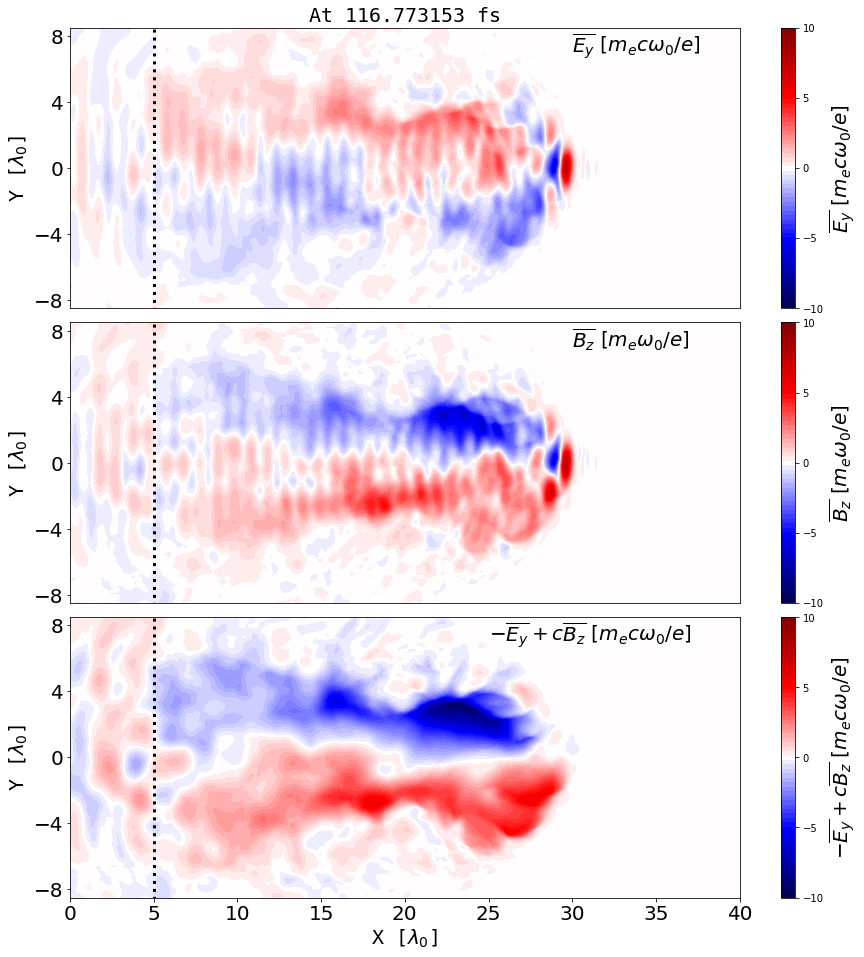

In [31]:
#!/public/home/users/bio001/tools/python-2.7.11/bin/python
import sdf
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
import matplotlib.colors as mcolors 
import scipy.ndimage as ndimage
  
if __name__ == "__main__":
    print ('This is main of module "test2d.py"')
    ######## Constant defined here ########
    pi        =     3.1415926535897932384626
    q0        =     1.602176565e-19 # C
    m0        =     9.10938291e-31  # kg
    v0        =     2.99792458e8    # m/s^2
    kb        =     1.3806488e-23   # J/K
    mu0       =     4.0e-7*np.pi       # N/A^2
    epsilon0  =     8.8541878176203899e-12 # F/m
    h_planck  =     6.62606957e-34  # J s
    wavelength=     1.0e-6
    frequency =     v0*2*pi/wavelength

    exunit    =     m0*v0*frequency/q0
    bxunit    =     m0*frequency/q0
    denunit    =     frequency**2*epsilon0*m0/q0**2
    jalf      =     4*np.pi*epsilon0*m0*v0**3/q0/wavelength**2
    print('electric field unit: '+str(exunit))
    print('magnetic field unit: '+str(bxunit))
    print('density unit nc: '+str(denunit))

    font = {'family' : 'monospace',  
          'color'  : 'black',  
          'weight' : 'normal',  
          'size'   : 20,  
          }  
    
##below is for generating mid transparent colorbar
    c_red = matplotlib.colors.colorConverter.to_rgba('red')
    c_blue= matplotlib.colors.colorConverter.to_rgba('blue')
    c_white_trans = matplotlib.colors.colorConverter.to_rgba('white',alpha = 0.0)
    cmap_rb = matplotlib.colors.LinearSegmentedColormap.from_list('rb_cmap',[c_red,c_white_trans,c_blue],128) 
    cmap_br = matplotlib.colors.LinearSegmentedColormap.from_list('rb_cmap',[c_blue,c_white_trans,c_red],128) 
##end for transparent colorbar##

##below is for norm colorbar
    class MidpointNormalize(colors.Normalize):
        def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
            self.midpoint = midpoint
            colors.Normalize.__init__(self, vmin, vmax, clip)

        def __call__(self, value, clip=None):
            # I'm ignoring masked values and all kinds of edge cases to make a
            # simple example...
            x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
            return np.ma.masked_array(np.interp(value, x, y)) 
##end for norm colorbar####

    #### header data ####
    data_e = sdf.read("./Data_uniform/e_fields0006.sdf",dict=True)
    data_b = sdf.read("./Data_uniform/b_fields0006.sdf",dict=True)
    header=data_e['Header']
    time=header['time']
    x  = data_e['Grid/Grid_mid'].data[0]/1.0e-6
    print('ok')
    y  = data_e['Grid/Grid_mid'].data[1]/1.0e-6
    X, Y = np.meshgrid(x, y)

    line_y = np.linspace(-12,12,1001)
    line_x = np.zeros_like(line_y)+5
    
    plt.subplot(3,1,1)
    #den = data['Derived/Number_Density/Subset_high_e'].data/denunit
    
    #levels = np.logspace(-0.3, 2, 51)/2
    #den.T[den.T > 49.999]=49.999 
    #plt.contourf(X, Y, den.T, levels=levels, norm=mcolors.LogNorm(vmin=levels.min(), vmax=levels.max()), cmap='binary')
    ##### manifesting colorbar, changing label and axis properties ####
    #cbar=plt.colorbar(ticks=np.logspace(0.0, 2.0, 3))
    #cbar.set_label(r'$n_e\ [n_c]$', fontdict=font)
    
    ex = data_e['Electric Field/Ey_averaged'].data/exunit
 #   ex[ex > 8]=8 
 #   ex[ex < -8]=-8 
    eee=np.max([-np.min(ex.T),np.max(ex.T)])
    levels = np.linspace(-10, 10, 64)
    plt.contourf(X, Y, ex.T, levels=levels, norm=mcolors.Normalize(vmin=-10.0, vmax=10.0), cmap=cm.seismic)
    plt.plot(line_x,line_y,linewidth=3,linestyle=':',color='k')
    #plt.contourf(X, Y, ex.T, levels=levels, cmap=cm.seismic)
    #### manifesting colorbar, changing label and axis properties ####
    #cbar=plt.colorbar()
    cbar=plt.colorbar(ticks=[-10.0, -10.0/2, 0.0, 10.0/2, 10.0])
    cbar.set_label(r'$\overline{E_y}\ [m_ec\omega_0/e]$',fontdict=font)      
    plt.text(30,7,r'$\overline{E_y}\ [m_ec\omega_0/e]$',fontdict=font)
    #plt.xlabel(r'X [$\lambda_0$]',fontdict=font)
    plt.ylabel(r'Y [$\lambda_0$]',fontdict=font)
    plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    plt.xticks([])
    plt.title('At '+str(round(time/1.0e-15,6))+' fs',fontdict=font)
    plt.xlim(0,40)
    plt.ylim(-8.5,8.5)
    plt.yticks(np.linspace(-8,8,5))
    
    plt.subplot(3,1,2)
    ex = data_b['Magnetic Field/Bz_averaged'].data/bxunit
 #   ex[ex > 8]=8 
 #   ex[ex < -8]=-8 
    eee=np.max([-np.min(ex.T),np.max(ex.T)])
    levels = np.linspace(-10, 10, 64)
    plt.contourf(X, Y, ex.T, levels=levels, norm=mcolors.Normalize(vmin=-10.0, vmax=10.0), cmap=cm.seismic)
    plt.plot(line_x,line_y,linewidth=3,linestyle=':',color='k')
 #   plt.contourf(X, Y, ex.T, levels=levels, cmap=cm.seismic)
    #### manifesting colorbar, changing label and axis properties ####
    #cbar=plt.colorbar()
    cbar=plt.colorbar(ticks=[-10.0, -10.0/2, 0.0, 10.0/2, 10.0])
    cbar.set_label(r'$\overline{B_z}\ [m_e\omega_0/e]$',fontdict=font)    
    plt.text(30,7,r'$\overline{B_z}\ [m_e\omega_0/e]$',fontdict=font)
    #plt.xlabel(r'X [$\lambda_0$]',fontdict=font)
    plt.ylabel(r'Y [$\lambda_0$]',fontdict=font)
    plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    plt.xticks([])
    plt.xlim(0,40)
    plt.ylim(-8.5,8.5)
    plt.yticks(np.linspace(-8,8,5))
    
    plt.subplot(3,1,3)
    ex = data_b['Magnetic Field/Bz_averaged'].data/bxunit-data_e['Electric Field/Ey_averaged'].data/exunit
 #   ex[ex > 8]=8 
 #   ex[ex < -8]=-8 
    eee=np.max([-np.min(ex.T),np.max(ex.T)])
    levels = np.linspace(-10, 10, 64)
    plt.contourf(X, Y, ex.T, levels=levels, norm=mcolors.Normalize(vmin=-10.0, vmax=10.0), cmap=cm.seismic)
    plt.plot(line_x,line_y,linewidth=3,linestyle=':',color='k')
 #   plt.contourf(X, Y, ex.T, levels=levels, cmap=cm.seismic)
    #### manifesting colorbar, changing label and axis properties ####
    cbar=plt.colorbar(ticks=[-10.0, -5.0, 0.0, 5.0, 10.0])
    #cbar=plt.colorbar()
    cbar.set_label(r'$-\overline{E_y}+c\overline{B_z}\ [m_ec\omega_0/e]$',fontdict=font)   
    plt.text(25,7,r'$-\overline{E_y}+c\overline{B_z}\ [m_ec\omega_0/e]$',fontdict=font)
    plt.xlabel(r'X [$\lambda_0$]',fontdict=font)
    plt.ylabel(r'Y [$\lambda_0$]',fontdict=font)
    plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.tick_params(labelbottom='off')  
    plt.xlim(0,40)
    plt.ylim(-8.5,8.5)
    plt.yticks(np.linspace(-8,8,5))

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.051)
    
    fig = plt.gcf()
    fig.set_size_inches(15, 16)
    fig.savefig('./figure_wrap_up/Ey_Bz_uniform.png',format='png',dpi=160)
    #plt.close("all")

In [66]:
data = sdf.read("./Data/0005.sdf",dict=True)
header=data['Header']
time=header['time']
x  = data['Grid/Grid_mid'].data[0]/1.0e-6
print('ok')
y  = data['Grid/Grid_mid'].data[1]/1.0e-6
X, Y = np.meshgrid(x, y)


ex = data['Electric Field/Ey_averaged'].data/exunit
ex=ex[:,200:250]
print(ex.shape)
#ex=ex[:,350:400]
ex.min()
#ex=ex[:,400:450]

ok
(3000, 50)


-2.65830144768023

In [13]:
py[100,5]

-10.0456760567818

In [ ]:
import sdf
import matplotlib
#matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os


######## Constant defined here ########
pi        =     3.1415926535897932384626
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
print('electric field unit: '+str(exunit))
print('magnetic field unit: '+str(bxunit))
print('density unit nc: '+str(denunit))

font = {'family' : 'monospace',  
        'style'  : 'normal',
        'color'  : 'black',  
	    'weight' : 'normal',  
        'size'   : 14,  
       }  


directory = './tacc_workx_txt/'
px = np.loadtxt(directory+'px2d.txt')
py = np.loadtxt(directory+'py2d.txt')
xx = np.loadtxt(directory+'xx2d.txt')
yy = np.loadtxt(directory+'yy2d.txt')
workx2d = np.loadtxt(directory+'workx2d.txt')
worky2d = np.loadtxt(directory+'worky2d.txt')
fieldex = np.loadtxt(directory+'field2dex.txt')/4.0
fieldey = np.loadtxt(directory+'field2dey.txt')/4.0
fieldbz = np.loadtxt(directory+'field2dbz.txt')/4.0

ey_averaged = -8.0/3.2*yy
bz_averaged = -8.0/3.2*yy

laser_ey = fieldey-ey_averaged
laser_bz = fieldbz-bz_averaged


gg = (px**2+py**2+1)**0.5
R = gg-px
theta = np.arctan2(py,px)

number=400

tt = np.linspace(5.0,89.9,850)
#tt = tt[:,np.newaxis]

for index in range(gg[:,0].size):
    plt.subplot(3,4,1)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=601.)

    #data = sdf.read("./Data/0000.sdf",dict=True)
    #x  = data['Grid/Grid_mid'].data[0]/1.0e-6
    #y  = data['Grid/Grid_mid'].data[1]/1.0e-6
    #X, Y = np.meshgrid(x, y)
    #den = data['Derived/Number_Density/Subset_high_e'].data/denunit
    #levels = np.linspace(np.min(den.T), np.max(den.T), 40) 
    #plt.contourf(X, Y, den.T, levels=levels, norm=matplotlib.colors.Normalize(vmin=0.,vmax=50.), cmap=cm.Greens)

    #data = sdf.read("./Data/0010.sdf",dict=True)
    #x  = data['Grid/Grid_mid'].data[0]/1.0e-6
    #y  = data['Grid/Grid_mid'].data[1]/1.0e-6
    #X, Y = np.meshgrid(x, y)
    #den = data['Derived/Number_Density/Subset_high_e'].data/denunit
    #levels = np.linspace(np.min(den.T), np.max(den.T), 40) 
    #plt.contourf(X, Y, den.T, levels=levels, norm=matplotlib.colors.Normalize(vmin=0.,vmax=50.), cmap=cm.Greens)

    #data = sdf.read("./Data/0013.sdf",dict=True)
    #x  = data['Grid/Grid_mid'].data[0]/1.0e-6
    #y  = data['Grid/Grid_mid'].data[1]/1.0e-6
    #X, Y = np.meshgrid(x, y)
    #den = data['Derived/Number_Density/Subset_high_e'].data/denunit
    #levels = np.linspace(np.min(den.T), np.max(den.T), 40) 
    #plt.contourf(X, Y, den.T, levels=levels, norm=matplotlib.colors.Normalize(vmin=0.,vmax=50.), cmap=cm.Greens)



    plt.plot(xx[index,:], yy[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:], yy[index,:], c=gg[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar( ticks=np.linspace(np.min(1), np.max(601), 5) )
    cbar.set_label(r'$\gamma$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x\ [\lambda]$',fontdict=font)
    plt.ylabel(r'$y\ [\lambda]$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(3,4,2)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=40)

    plt.plot(xx[index,:],-fieldey[index,:]+(px/gg*fieldbz)[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],-fieldey[index,:]+(px/gg*fieldbz)[index,:], c=-fieldey[index,:]+(px/gg*fieldbz)[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$-E_y+v_xB_z$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$-E_y+v_xB_z$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    theta = np.arctan2(py,px)/np.pi*180    
    plt.subplot(3,4,3)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=601.)

    plt.plot(theta[index,:], gg[index,:],':k',linewidth=0.5)
    plt.scatter(theta[index,:], gg[index,:], c=gg[index,:], norm=norm, s=20, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar( ticks=np.linspace(np.min(1), np.max(601), 5) )
    cbar.set_label(r'$\gamma$',fontdict=font)
    #   plt.legend(loc='upper right')
    plt.xlim(-20,20)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$\theta\ [degree]$',fontdict=font)
    plt.ylabel(r'$\gamma$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(3,4,4)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=40)
    plt.plot(xx[index,:],-fieldex[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],-fieldex[index,:], c=-fieldex[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$-E_x$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$-E_x$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(3,4,5)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=20)

    plt.plot(xx[index,:],-fieldey[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],-fieldey[index,:], c=-fieldey[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$-E_y$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$-E_y$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(3,4,6)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=20)

    plt.plot(xx[index,:],(px/gg*fieldbz)[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],(px/gg*fieldbz)[index,:], c=(px/gg*fieldbz)[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$v_xB_z$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$v_xB_z$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
    
 

    plt.subplot(3,4,7)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=20)

    plt.plot(xx[index,:],px[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],px[index,:], c=px[index,:], s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$p_x$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$p_x$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
 
    

    plt.subplot(3,4,8)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=20)

    plt.plot(xx[index,:],py[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],py[index,:], c=py[index,:],  s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$p_y$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$p_y$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
 
    
    
    plt.subplot(3,4,9)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=20)

    plt.plot(xx[index,:],-laser_ey[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],-laser_ey[index,:], c=-laser_ey[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$-E_{ylaser}$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$-E_{ylaser}$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(3,4,10)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=20)

    plt.plot(xx[index,:],(px/gg*laser_bz)[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],(px/gg*laser_bz)[index,:], c=(px/gg*laser_bz)[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$v_xB_{zlaser}$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$v_xB_{zlaser}$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
    
    
    plt.subplot(3,4,11)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=20)

    plt.plot(xx[index,:],R[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],R[index,:], c=R[index,:],  s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$R$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$R$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
    
    
    
    
    plt.subplot(3,4,12)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=20)

    plt.plot(xx[index,:],theta[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],theta[index,:], c=theta[index,:], s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$\theta$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$\theta [degree]$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
 
    

    
    
    
    #plt.show()
    #lt.figure(figsize=(100,100))
    fig = plt.gcf()
    fig.set_size_inches(32, 20)
    fig.savefig('./jpg_tacc_workx/'+str(index).zfill(4)+'.png',format='png',dpi=80)
    plt.close("all")
    print('finised '+str(index))


electric field unit: 3210700953900.7065
magnetic field unit: 10709.745586397328
density unit nc: 1.1148542159362525e+27
finised 0
finised 1
finised 2
finised 3
finised 4
finised 5
finised 6
finised 7
finised 8
finised 9
finised 10
finised 11
finised 12
finised 13
finised 14
finised 15
finised 16
finised 17
finised 18
finised 19
finised 20
finised 21
finised 22
finised 23
finised 24
finised 25
finised 26
finised 27
finised 28
finised 29
finised 30
finised 31
finised 32
finised 33
finised 34
finised 35
finised 36
finised 37
finised 38
finised 39
finised 40
finised 41
finised 42
finised 43
finised 44
finised 45
finised 46
finised 47
finised 48
finised 49
finised 50
finised 51
finised 52
finised 53
finised 54
finised 55
finised 56
finised 57
finised 58
finised 59
finised 60
finised 61
finised 62
finised 63
finised 64
finised 65
finised 66
finised 67
finised 68
finised 69
finised 70
finised 71
finised 72
finised 73
finised 74
finised 75
finised 76
finised 77
finised 78
finised 79
finised 80

In [ ]:
import sdf
import matplotlib
#matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os


######## Constant defined here ########
pi        =     3.1415926535897932384626
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
print('electric field unit: '+str(exunit))
print('magnetic field unit: '+str(bxunit))
print('density unit nc: '+str(denunit))

font = {'family' : 'monospace',  
        'style'  : 'normal',
        'color'  : 'black',  
	    'weight' : 'normal',  
        'size'   : 14,  
       }  


directory = './tacc_worky_txt/'
px = np.loadtxt(directory+'px2d.txt')
py = np.loadtxt(directory+'py2d.txt')
xx = np.loadtxt(directory+'xx2d.txt')
yy = np.loadtxt(directory+'yy2d.txt')
workx2d = np.loadtxt(directory+'workx2d.txt')
worky2d = np.loadtxt(directory+'worky2d.txt')
fieldex = np.loadtxt(directory+'field2dex.txt')
fieldey = np.loadtxt(directory+'field2dey.txt')
fieldbz = np.loadtxt(directory+'field2dbz.txt')
gg = (px**2+py**2+1)**0.5

number=400

tt = np.linspace(5.0,89.9,850)
#tt = tt[:,np.newaxis]

for index in range(gg[:,0].size):
    plt.subplot(2,4,1)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=601.)


    plt.plot(xx[index,:], yy[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:], yy[index,:], c=gg[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar( ticks=np.linspace(np.min(1), np.max(601), 5) )
    cbar.set_label(r'$\gamma$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x\ [\lambda]$',fontdict=font)
    plt.ylabel(r'$y\ [\lambda]$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(2,4,2)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=40)

    plt.plot(xx[index,:],-fieldey[index,:]+(px/gg*fieldbz)[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],-fieldey[index,:]+(px/gg*fieldbz)[index,:], c=-fieldey[index,:]+(px/gg*fieldbz)[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$-E_y+v_xB_z$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$-E_y+v_xB_z$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    theta = np.arctan2(py,px)/np.pi*180    
    plt.subplot(2,4,3)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=601.)

    plt.plot(theta[index,:], gg[index,:],':k',linewidth=0.5)
    plt.scatter(theta[index,:], gg[index,:], c=gg[index,:], norm=norm, s=20, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar( ticks=np.linspace(np.min(1), np.max(601), 5) )
    cbar.set_label(r'$\gamma$',fontdict=font)
    #   plt.legend(loc='upper right')
    plt.xlim(-20,20)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$\theta\ [degree]$',fontdict=font)
    plt.ylabel(r'$\gamma$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(2,4,4)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=40)
    plt.plot(xx[index,:],-fieldex[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],-fieldex[index,:], c=-fieldex[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$-E_x$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$-E_x$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(2,4,5)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=20)

    plt.plot(xx[index,:],-fieldey[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],-fieldey[index,:], c=-fieldey[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$-E_y$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$-E_y$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(2,4,6)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=20)

    plt.plot(xx[index,:],(px/gg*fieldbz)[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],(px/gg*fieldbz)[index,:], c=(px/gg*fieldbz)[index,:], norm=norm, s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$v_xB_z$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$v_xB_z$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
    
 

    plt.subplot(2,4,7)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=20)

    plt.plot(xx[index,:],px[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],px[index,:], c=px[index,:], s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$p_x$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$p_x$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
 
    

    plt.subplot(2,4,8)
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=20)

    plt.plot(xx[index,:],py[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:],py[index,:], c=py[index,:],  s=2, cmap='rainbow', edgecolors='None')
    cbar=plt.colorbar()
    cbar.set_label(r'$p_y$',fontdict=font)
    #   plt.legend(loc='upper right')
    #plt.xlim(-500,900)
    #plt.ylim(-4.9,4.9)
    plt.xlabel(r'$x [\lambda_0]$',fontdict=font)
    plt.ylabel(r'$p_y$',fontdict=font)
    #plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
 
    
    
    #plt.show()
    #lt.figure(figsize=(100,100))
    fig = plt.gcf()
    fig.set_size_inches(32, 13)
    fig.savefig('./jpg_tacc_worky/'+str(index).zfill(4)+'.png',format='png',dpi=80)
    plt.close("all")
    print('finised '+str(index))


In [32]:
np.where(px[71,:] < 0)

(array([ 21,  22,  23,  24,  25,  46,  47,  48,  49,  50,  51,  53,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
         95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 125, 126, 128, 129, 131, 132, 133, 134, 135, 136, 138, 139,
        141, 142, 143, 144, 147, 148, 150, 151, 152, 153, 154, 157, 158,
        159, 160, 161, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
        176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
        196, 197, 198, 199, 200, 206, 207, 208, 209, 210, 212, 213, 214,
        216, 217, 218, 219]),)

In [41]:
px[71,210:225]

array([-0.53406917,  0.2886892 , -0.04238763, -0.65979792, -0.11188988,
        0.33055801, -0.09211556, -0.56956145, -1.13227852, -1.22061009,
        0.10201084,  2.19062797,  2.89810938,  4.30748766,  5.97218351])

In [42]:
py[71,210:225]

array([-0.37340985, -0.42444859,  0.03680279, -0.79647939, -1.09284187,
       -0.1264734 ,  0.21758592, -0.19592678, -0.59433029,  1.52613579,
       -0.93934068, -2.94731561, -3.37167342, -2.55353353, -2.275376  ])

In [44]:
gg[0,:].size

850

In [18]:
np.linspace(-10,10,5)

array([-10.,  -5.,   0.,   5.,  10.])

electric field unit: 3210700953900.7065
magnetic field unit: 10709.745586397328
density unit nc: 1.1148542159362525e+27
finised 24.4898%


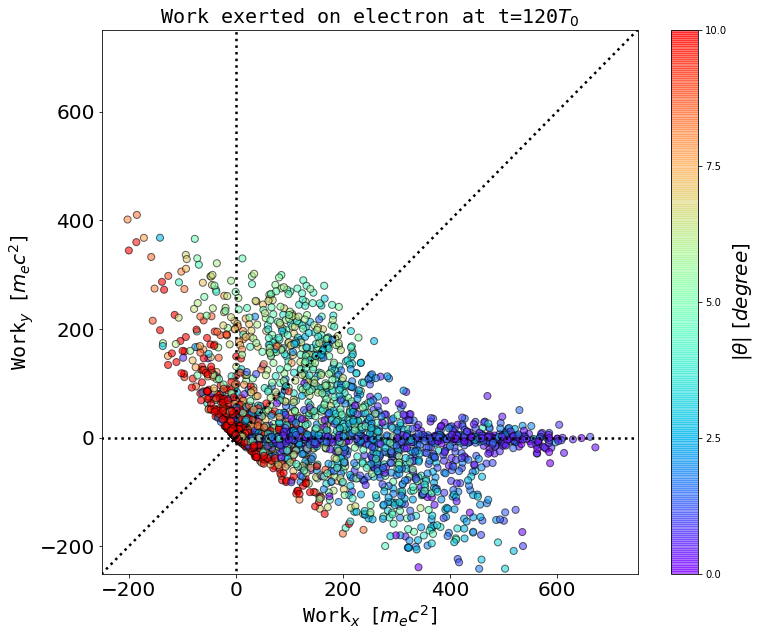

In [52]:
import sdf
import matplotlib
#matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os


######## Constant defined here ########
pi        =     3.1415926535897932384626
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
print('electric field unit: '+str(exunit))
print('magnetic field unit: '+str(bxunit))
print('density unit nc: '+str(denunit))

font = {'family' : 'monospace',  
        'style'  : 'normal',
        'color'  : 'black',  
	    'weight' : 'normal',  
        'size'   : 20,  
       }  
######### Parameter you should set ###########
start   =  1  # start time
stop    =  49  # end time
step    =  1  # the interval or step

n=12

px = np.loadtxt('./txt/px_'+str(n).zfill(4)+'sdf.txt')
py = np.loadtxt('./txt/py_'+str(n).zfill(4)+'sdf.txt')
grid_x = np.loadtxt('./txt/grid_x_'+str(n).zfill(4)+'sdf.txt')
grid_y = np.loadtxt('./txt/grid_y_'+str(n).zfill(4)+'sdf.txt')
work_x = np.loadtxt('./txt/work_x_'+str(n).zfill(4)+'sdf.txt')
work_y = np.loadtxt('./txt/work_y_'+str(n).zfill(4)+'sdf.txt')

choice = np.random.choice(range(px.size), 4000, replace=False)
px = px[choice]
py = py[choice]
work_x = work_x[choice]
work_y = work_y[choice]


theta = np.arctan2(py,px)*180.0/np.pi
    

theta[theta < -10] = -10
theta[theta >  10] =  10


color_index = abs(theta)

#    plt.subplot()
plt.scatter(work_x, work_y, c=color_index, s=50, cmap='rainbow', edgecolors='black', alpha=0.6)
cbar=plt.colorbar( ticks=np.linspace(np.min(color_index), np.max(color_index), 5) )
cbar.set_label(r'$|\theta|\ [degree]$',fontdict=font)

plt.plot(np.linspace(-500,900,1001), np.zeros([1001]),':k',linewidth=2.5)
plt.plot(np.zeros([1001]), np.linspace(-500,900,1001),':k',linewidth=2.5)
plt.plot(np.linspace(-500,900,1001), np.linspace(-500,900,1001),':k',linewidth=2.5)
 #   plt.legend(loc='upper right')
plt.xlim(-250,750)
plt.ylim(-250,750)
plt.xlabel('Work$_x$ $[m_ec^2]$',fontdict=font)
plt.ylabel('Work$_y$ $[m_ec^2]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.title('Work exerted on electron at t=120$T_0$',fontdict=font)

#plt.show()
#lt.figure(figsize=(100,100))
fig = plt.gcf()
fig.set_size_inches(12, 10)
fig.savefig('./figure_wrap_up/theta'+str(n).zfill(4)+'.png',format='png',dpi=160)
#plt.close("all")

print('finised '+str(round(100.0*(n-start+step)/(stop-start+step),4))+'%')

In [28]:
px.size

71343

In [31]:
np.random.choice(range(10), 8, replace=False)

array([3, 4, 7, 1, 6, 2, 9, 8])

In [ ]:
import sdf
import matplotlib
#matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os


######## Constant defined here ########
pi        =     3.1415926535897932384626
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
print('electric field unit: '+str(exunit))
print('magnetic field unit: '+str(bxunit))
print('density unit nc: '+str(denunit))

font = {'family' : 'monospace',  
        'style'  : 'normal',
        'color'  : 'black',  
	    'weight' : 'normal',  
        'size'   : 14,  
       }  


directory = './txt_trace/'
px = np.loadtxt(directory+'px2d.txt')
py = np.loadtxt(directory+'py2d.txt')
xx = np.loadtxt(directory+'xx2d.txt')
yy = np.loadtxt(directory+'yy2d.txt')
workx2d = np.loadtxt(directory+'workx2d.txt')
worky2d = np.loadtxt(directory+'worky2d.txt')
gg = (px**2+py**2+1)**0.5


    
plt.subplot()
norm = matplotlib.colors.Normalize(vmin=1.,vmax=601.)

data = sdf.read("./Data/0001.sdf",dict=True)
x  = data['Grid/Grid_mid'].data[0]/1.0e-6
y  = data['Grid/Grid_mid'].data[1]/1.0e-6
X, Y = np.meshgrid(x, y)
den = data['Derived/Number_Density/Subset_high_e'].data/denunit
levels = np.linspace(np.min(den.T), np.max(den.T), 40) 
plt.contourf(X, Y, den.T, levels=levels, norm=matplotlib.colors.Normalize(vmin=0.,vmax=50.), cmap=cm.Greens)

data = sdf.read("./Data/0625.sdf",dict=True)
x  = data['Grid/Grid_mid'].data[0]/1.0e-6
y  = data['Grid/Grid_mid'].data[1]/1.0e-6
X, Y = np.meshgrid(x, y)
den = data['Derived/Number_Density/Subset_high_e'].data/denunit
levels = np.linspace(np.min(den.T), np.max(den.T), 40) 
plt.contourf(X, Y, den.T, levels=levels, norm=matplotlib.colors.Normalize(vmin=0.,vmax=50.), cmap=cm.Greens)

data = sdf.read("./Data/1250.sdf",dict=True)
x  = data['Grid/Grid_mid'].data[0]/1.0e-6
y  = data['Grid/Grid_mid'].data[1]/1.0e-6
X, Y = np.meshgrid(x, y)
den = data['Derived/Number_Density/Subset_high_e'].data/denunit
levels = np.linspace(np.min(den.T), np.max(den.T), 40) 
plt.contourf(X, Y, den.T, levels=levels, norm=matplotlib.colors.Normalize(vmin=0.,vmax=50.), cmap=cm.Greens)


for index in range(108):
    plt.plot(xx[index,:], yy[index,:],':k',linewidth=0.5)
    plt.scatter(xx[index,:], yy[index,:], c=gg[index,:], norm=norm, s=20, cmap='rainbow', edgecolors='None')
cbar=plt.colorbar( ticks=np.linspace(np.min(1), np.max(601), 5) )
cbar.set_label(r'$\gamma$',fontdict=font)
#   plt.legend(loc='upper right')
#plt.xlim(-500,900)
plt.ylim(-4.9,4.9)
plt.xlabel(r'$x\ [\lambda]$',fontdict=font)
plt.ylabel(r'$y\ [\lambda]$',fontdict=font)
#plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)


#plt.show()
#lt.figure(figsize=(100,100))
fig = plt.gcf()
fig.set_size_inches(8, 6.5)
#fig.savefig('./trajectory_x.png',format='png',dpi=80)
#plt.close("all")
#print('finised '+str(round(100.0*(n-start+step)/(stop-start+step),4))+'%')
